# **Compare performance on nonlinear data (with all regression algorithms)**
Quistian Navarro Juan Luis \
A341807@alumnos.uaslp.mx \
Ing. Sistemas Inteligentes, Gen 2021 \
Machine Learning, Group 281601

### 02/19/24

### **Abstract**

In this notebook, we delve into a comprehensive analysis of regression models. Our exploration focuses on comparing the performance of various regression models using a dataset that includes real data (DS-5-1-1-GAP-0-1-N-0_v2) along with noise data from DS-5-1-1-GAP-1-1-1-N-1_v2 and DS-5-1-GAP-5-1-1-N-3_v2.

The activity focuses on employing 100 realizations per noise level. Our evaluation criteria are multifaceted, incorporating metrics such as Mean Squared Error (MSE) for both the training and testing phases in the initial activity. In addition, in the second activity, we augment our evaluation to encompass bias and variance considerations, thus providing a more complete understanding of model performance under varying conditions. Through this comparative analysis, we aim to provide information on the effectiveness and robustness of different regression models, thus helping to make informed decisions in real-world applications.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from scipy.fft import fft
import math as m

C:\Users\juanq\AppData\Local\Temp\ipykernel_20112\300021418.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# dataset phat

DATA_PHAT = '../dataset/'
DATA_PATH_TRUE = 'DS-5-1-GAP-0-1-N-0_v2.csv'
DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
DATA_PATH_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'

In [3]:
df_true = pd.read_csv(DATA_PHAT + DATA_PATH_TRUE, header=None)
df_noise1 = pd.read_csv(DATA_PHAT + DATA_PATH_NOISE1,header=None)
df_noise2 = pd.read_csv(DATA_PHAT + DATA_PATH_NOISE2,header=None)

In [4]:
df_true.head(5)

,0,1,2
0,0.00,17.49,17.04
1,2.12,17.65,17.17
2,3.06,17.70,17.24
3,4.16,17.73,17.33
4,4.93,17.75,17.39


In [5]:
df_noise1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.00,17.49,17.50,17.49,17.49,17.50,17.49,17.50,17.49,17.49,...,17.04,17.04,17.05,17.04,17.03,17.04,17.04,17.04,17.03,17.04
1,2.12,17.65,17.65,17.64,17.64,17.65,17.65,17.65,17.64,17.65,...,17.16,17.17,17.18,17.18,17.18,17.17,17.17,17.18,17.18,17.18
2,3.06,17.69,17.70,17.70,17.69,17.69,17.70,17.69,17.69,17.70,...,17.25,17.24,17.24,17.24,17.25,17.24,17.24,17.24,17.25,17.25
3,4.16,17.74,17.73,17.74,17.73,17.74,17.74,17.74,17.74,17.73,...,17.33,17.32,17.33,17.33,17.33,17.32,17.33,17.33,17.32,17.32
4,4.93,17.75,17.74,17.73,17.74,17.74,17.75,17.75,17.75,17.74,...,17.38,17.39,17.39,17.39,17.39,17.39,17.39,17.39,17.39,17.39


In [6]:
df_noise2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.00,17.61,17.55,17.48,17.46,17.43,17.53,17.35,17.66,17.60,...,17.16,17.03,17.12,17.04,17.03,16.98,17.24,16.97,17.09,17.05
1,2.12,17.71,17.55,17.70,17.52,17.67,17.62,17.76,17.73,17.63,...,17.24,17.17,17.24,16.95,17.17,17.19,17.14,17.18,17.17,16.97
2,3.06,17.68,17.77,17.61,17.72,17.73,17.78,17.80,17.81,17.68,...,17.42,17.27,17.22,17.31,17.31,17.20,17.19,17.22,17.29,17.26
3,4.16,17.62,17.72,17.66,17.69,17.75,17.65,17.82,17.78,17.86,...,17.32,17.28,17.25,17.45,17.37,17.37,17.47,17.34,17.33,17.56
4,4.93,17.80,17.54,17.66,17.71,17.82,17.69,17.70,17.81,17.82,...,17.33,17.46,17.39,17.52,17.40,17.38,17.42,17.31,17.38,17.38


# **Activity:  Use 100 realizations per level of noise**

# **Data: DS-5-1-GAP-1-1-N-1**

#### **Polynomial Regression**

In [7]:
#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
# Load data
X_test = df_true[0].to_numpy()[:,np.newaxis]
Y_test = df_true[1].to_numpy()[:,np.newaxis]

X_train = df_noise1[0].to_numpy()[:,np.newaxis]

print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)

Y = df_noise1.iloc[:,1:101]
y = Y.to_numpy()


degrees = list(range(2,20))

mean_bias = np.zeros(len(degrees))
mean_variance = np.zeros(len(degrees))

for j, degree in enumerate(degrees):
    bias = []
    y_pred_all = []

    for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        # create model
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        # training 
        model.fit(X_train, y_i)
        
        y_pred_all.append(model.predict(X_test))

        bias.append(abs(Y_test - y_pred_all[i]))

    # bias
    pred_mean = np.mean(bias, axis=0)
    mean_bias[j] = np.mean(pred_mean)

    # variance
    pred_variance = np.std(y_pred_all, axis=0)
    mean_variance[j] = np.mean(pred_variance)

print("Mean Bias:")
print(mean_bias)
print()
print("Mean Variance:")
print(mean_variance)

(50, 1)
(50, 1)
(45, 1)
Mean Bias:
[0.10361983 0.08780442 0.03847091 0.01668811 0.0102933  0.00898785
 0.00737389 0.00669004 0.01615585 0.01651086 0.01407579 0.01633646
 0.0263673  0.03827158 0.05005268 0.08763278 0.09121493 0.09245241]

Mean Variance:
[0.00147208 0.00171471 0.00189878 0.00203802 0.00223529 0.00238363
 0.00254565 0.00394676 0.0026084  0.00242827 0.00238885 0.00235898
 0.00234475 0.00243909 0.00241474 0.00212611 0.00210574 0.0020848 ]


<function matplotlib.pyplot.show(close=None, block=None)>

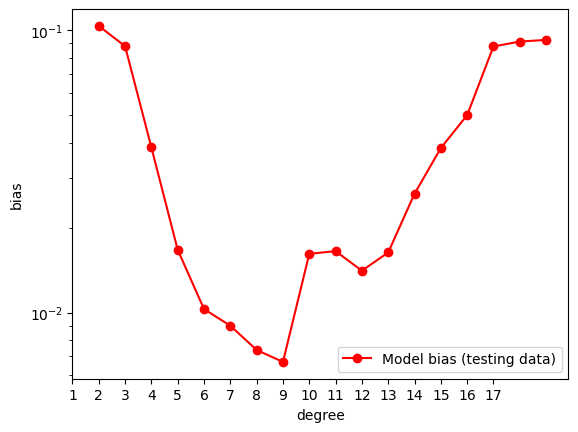

In [8]:
plt.xlabel('degree')
plt.ylabel('bias')
plt.plot(degrees, mean_bias,'-ro', label = 'Model bias (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(1,len(degrees)))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

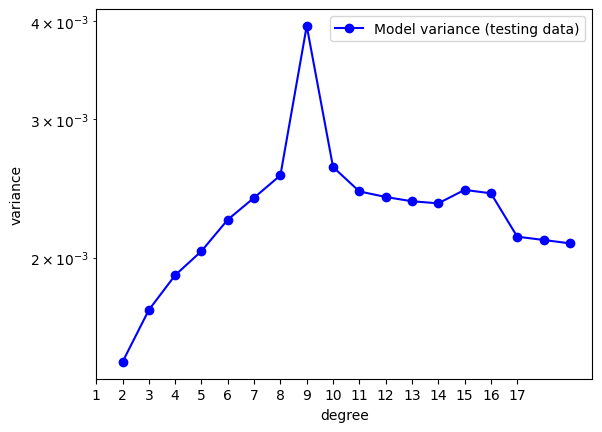

In [9]:
plt.xlabel('degree')
plt.ylabel('variance')
plt.plot(degrees, mean_variance,'-bo', label = 'Model variance (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(1,len(degrees)))
plt.show

In [10]:
best_degree = degrees[np.argmin(mean_bias)]
print(best_degree)
index_min =np.argmin(mean_bias)
print(index_min)

9
7


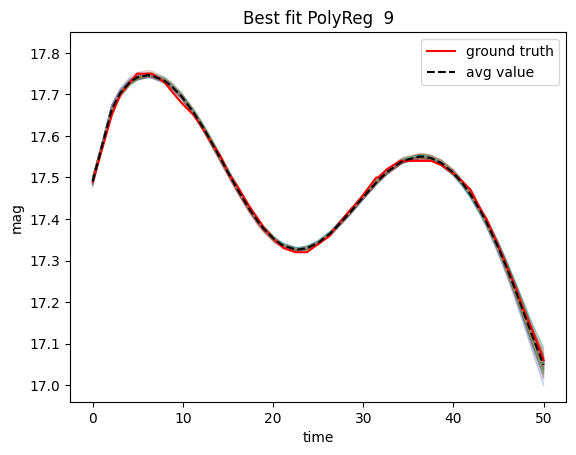

bias:  0.006690036291529672
variance 0.003946759748134829


In [11]:
plt.title( f'Best fit PolyReg  {best_degree}')
plt.ylim(Y_test.min() - 0.1, Y_test.max() + 0.1)


MSE_list_test = []
MSE_list_train =[]
y_pred_all = []

for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        # create model
        model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
        # training 
        model.fit(X_train, y_i)
        
        #Testing
        Y_pred_train = model.predict(X_train) 
        Y_pred_test = model.predict(X_test)

        MSE_train = mean_squared_error(y_i,Y_pred_train)
        MSE_test = mean_squared_error(Y_test,Y_pred_test)

        MSE_list_test.append(MSE_test)
        MSE_list_train.append(MSE_train)
                        
        y_pred_all.append(Y_pred_test)
        plt.plot(X_test,Y_pred_test,linewidth = 1, alpha = 0.3)

pred_mean = np.mean(y_pred_all, axis=0)
pred_variance = np.std(y_pred_all, axis=0)



plt.plot(X_test, Y_test, 'r', label = 'ground truth')

plt.plot(X_test, pred_mean, '--k', label = 'avg value')
plt.xlabel('time')
plt.ylabel('mag')
plt.legend(loc="best")
plt.show()

print('bias: ', mean_bias[index_min])
print('variance', mean_variance[index_min])

In [12]:
MSE_train = np.mean(MSE_list_train)
print('MSE_train: ',MSE_train)

MSE_test = np.mean(MSE_list_test)
print('MSE_test: ',MSE_test)

MSE_train:  8.512111257842205e-05
MSE_test:  7.283567745835302e-05


#### **Splines (B-spline)**

(50, 1)
(50, 1)
(45, 1)


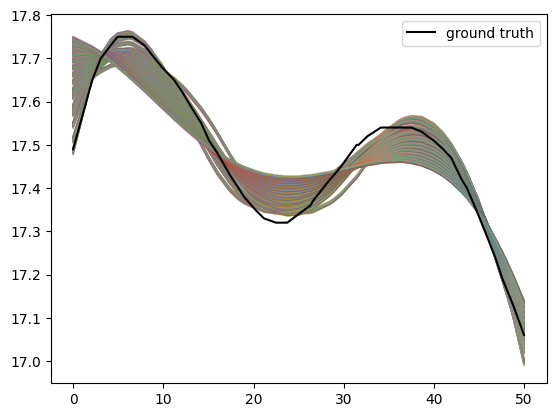

Mean Bias:
[0.03753138 0.01947464 0.02256899 0.01156363 0.01928863 0.0150147
 0.02209184 0.02341411 0.02802274 0.03148421 0.03548916 0.03972975
 0.04398461 0.04858668 0.05308472 0.0573883  0.06131321 0.0648641 ]

Mean Variance:
[0.00192881 0.00200077 0.00195926 0.00199313 0.0019467  0.00194404
 0.00191057 0.00188872 0.00186714 0.00184289 0.00182251 0.00180042
 0.00178091 0.00176207 0.0017452  0.00172973 0.00171575 0.00170293]


In [13]:
#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
# Load data
X_test = df_true[0].to_numpy()[:,np.newaxis]
Y_test = df_true[1].to_numpy()[:,np.newaxis]

X_train = df_noise1[0].to_numpy()[:,np.newaxis]



print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)



Y = df_noise1.iloc[:,1:101]
y = Y.to_numpy()

degrees = list(range(2,20))

mean_bias = np.zeros(len(degrees))
mean_variance = np.zeros(len(degrees))

for j, degree in enumerate(degrees):
    bias = []
    y_pred_all = []

    for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        #create model
        model = make_pipeline(SplineTransformer(n_knots=4, degree=degree), Ridge(alpha=1e-3))
        #training
        model.fit(X_train, y_i)

        #predictions
        Y_pred_train = model.predict(X_train)
        Y_pred_test = model.predict (X_test)

        y_pred_all.append(Y_pred_test)

        bias.append(abs(Y_test - y_pred_all[i]))

        plt.plot(X_test, Y_pred_test,linewidth = 1, alpha = 0.3)

    # bias
    pred_mean = np.mean(bias, axis=0)
    mean_bias[j] = np.mean(pred_mean)

    # variance
    pred_variance = np.std(y_pred_all, axis=0)
    mean_variance[j] = np.mean(pred_variance)

plt.plot(X_test, Y_test, label='ground truth', color = 'k')
plt.legend()
plt.show()

print("Mean Bias:")
print(mean_bias)
print()
print("Mean Variance:")
print(mean_variance)

<function matplotlib.pyplot.show(close=None, block=None)>

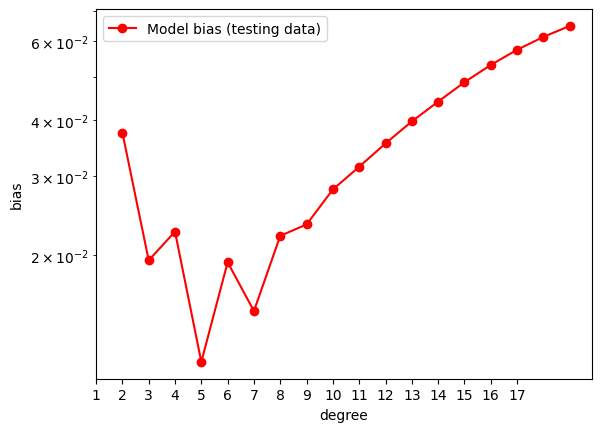

In [14]:
plt.xlabel('degree')
plt.ylabel('bias')
plt.plot(degrees, mean_bias,'-ro', label = 'Model bias (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(1,len(degrees)))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

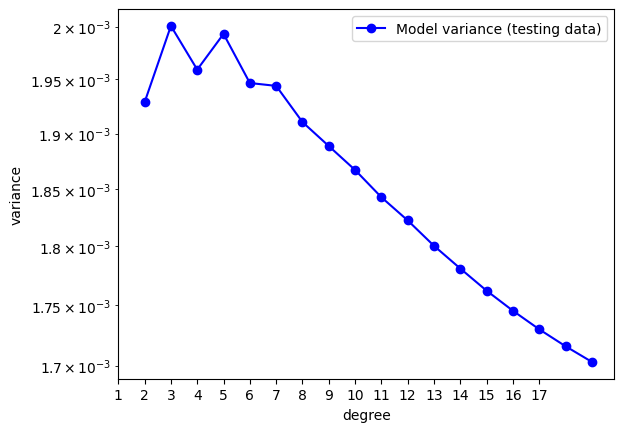

In [15]:
plt.xlabel('degree')
plt.ylabel('variance')
plt.plot(degrees, mean_variance,'-bo', label = 'Model variance (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(1,len(degrees)))
plt.show

In [16]:
best_degree = degrees[np.argmin(mean_bias)]
print(best_degree)

index_min = np.argmin(mean_bias)
print(index_min)

5
3


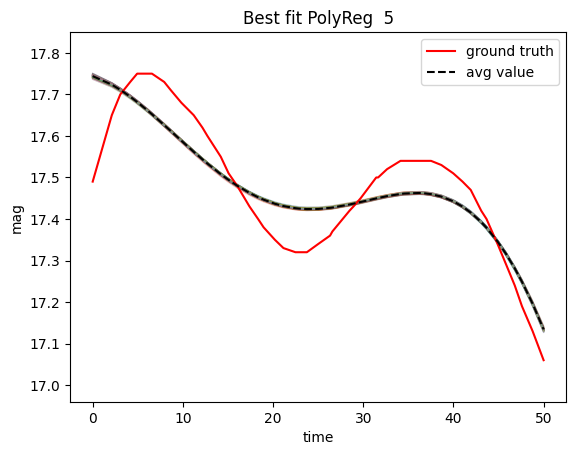

bias:  0.011563634204581886
variance 0.001993125121183679


In [17]:
plt.title( f'Best fit PolyReg  {best_degree}')
plt.ylim(Y_test.min() - 0.1, Y_test.max() + 0.1)

y_pred_all = []

MSE_list_train = []
MSE_list_test = []

for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        #create model
        model = make_pipeline(SplineTransformer(n_knots=4, degree=degree), Ridge(alpha=1e-3))
        #training
        model.fit(X_train, y_i)

        #predictions
        Y_pred_train = model.predict(X_train)
        Y_pred_test = model.predict (X_test)

        #MSE
        MSE_train = mean_squared_error(y_i, Y_pred_train)
        MSE_test = mean_squared_error(Y_test, Y_pred_test)
        
        MSE_list_train.append(MSE_train)
        MSE_list_test.append(MSE_test)

        y_pred_all.append(Y_pred_test)
        plt.plot(X_test,Y_pred_test,linewidth = 1, alpha = 0.3)

pred_mean = np.mean(y_pred_all, axis=0)
pred_variance = np.std(y_pred_all, axis=0)



plt.plot(X_test, Y_test, 'r', label = 'ground truth')

plt.plot(X_test, pred_mean, '--k', label = 'avg value')
plt.xlabel('time')
plt.ylabel('mag')
plt.legend(loc="best")
plt.show()

print('bias: ', mean_bias[index_min])
print('variance', mean_variance[index_min])

In [18]:
MSE_train = np.mean(MSE_list_train)
print('MSE_train: ',MSE_train)

MSE_test = np.mean(MSE_list_test)
print('MSE_test: ',MSE_test)

MSE_train:  0.00606479808328759
MSE_test:  0.005814183614339369


#### **Fourier**

Mean Bias:
[0.12328409 0.05799202 0.04568209 0.03358446 0.02751162 0.02318978
 0.02085649 0.01848195 0.01694538 0.01594828 0.01494815 0.0133464
 0.01309501 0.01172961 0.0110446  0.0109774  0.00888897 0.0087832
 0.00863953 0.00763873 0.00716563 0.00612747 0.00536327 0.00366718
 0.0037745  0.00538773 0.00618906 0.00716355 0.00772859 0.0086652
 0.00931838 0.00882928 0.01104786 0.01170972 0.01296795 0.01454332
 0.01578212 0.01656416]

Mean Variance:
[0.00083865 0.00083865 0.00083865 0.00083865 0.00083865 0.00083865
 0.00083865 0.00083865 0.00083865 0.00083865 0.00083865 0.00083865
 0.00083865 0.00083865 0.00083865 0.00083865 0.00083865 0.00083865
 0.00083865 0.00083865 0.00083865 0.00083865 0.00084317 0.00085053
 0.00085262 0.00085149 0.00085086 0.00085419 0.00086405 0.00087533
 0.0008864  0.00088785 0.00088734 0.00087677 0.00088009 0.00089215
 0.00090651 0.00088769]


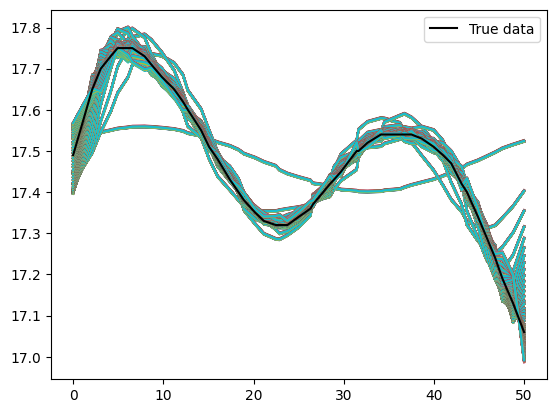

In [19]:
#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
# Load data
X_test = df_true[0].to_numpy()
Y_test = df_true[1].to_numpy()

X_train = df_noise1[0].to_numpy()



Y = df_noise1.iloc[:,1:101]
y = Y.to_numpy()
y_i = y[:, 1]

components = list(range(2,40))
mean_bias = np.zeros(len(components))
mean_variance = np.zeros(len(components))
    
for j, component in enumerate(components):
    bias = []
    y_pred_all = []
    for i in range(0,100):
        y_i = y[:, i]

        # ---------------train
        # Calculate the Fourier transform
        Y_train_fft = fft(y_i)

        # Select Fourier components
        n_components = component  
        Y_train_fft_filtered = np.zeros_like(Y_train_fft)
        Y_train_fft_filtered[:n_components] = Y_train_fft[:n_components]

        n_samples = y_i.size

        # Build the design matrix
        X_train_fourier = np.abs(np.fft.ifft(Y_train_fft_filtered).real)

        # Fit the linear regression model
        model = LinearRegression()
        model.fit(X_train_fourier[:, None], y_i)

        # ---------------test
        # Calculate the Fourier transform
        Y_test_fft = fft(Y_test)

        # # Select Fourier components
        Y_test_fft_filtered = np.zeros_like(Y_test_fft)
        Y_test_fft_filtered[:n_components] = Y_test_fft[:n_components]


        # Build the design matrix
        X_test_fourier = np.abs(np.fft.ifft(Y_test_fft_filtered).real)

        # Predictions
        Y_pred_test = model.predict(X_test_fourier[:, None])
        Y_pred_train = model.predict(X_train_fourier[:,None])
        y_pred_all.append(Y_pred_test)

        #bias
        bias.append(abs(Y_test - y_pred_all[i]))

        #plot
        plt.plot(X_test, Y_pred_test)

    # bias
    pred_mean = np.mean(bias, axis=0)
    mean_bias[j] = np.mean(pred_mean)

    # variance
    pred_variance = np.std(y_pred_all, axis=0)
    mean_variance[j] = np.mean(pred_variance)
    
print("Mean Bias:")
print(mean_bias)
print()
print("Mean Variance:")
print(mean_variance)

plt.plot(X_test, Y_test, label='True data', color = 'k')
plt.legend()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

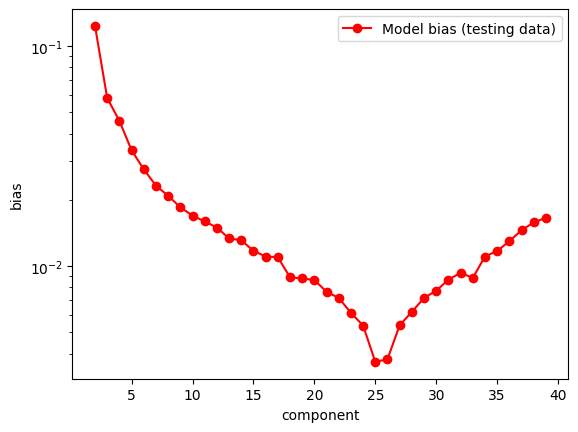

In [20]:
plt.xlabel('component')
plt.ylabel('bias')
plt.plot(components, mean_bias,'-ro', label = 'Model bias (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

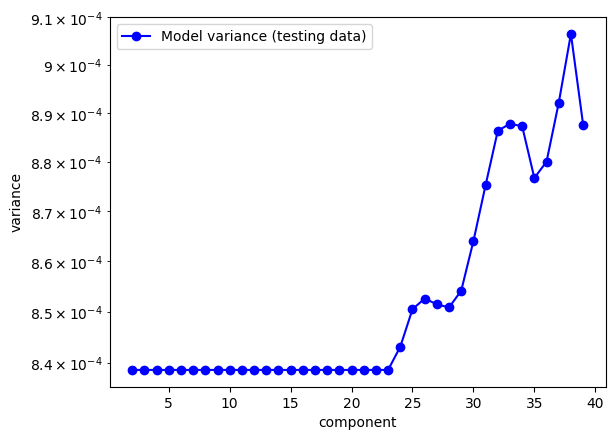

In [21]:
plt.xlabel('component')
plt.ylabel('variance')
plt.plot(components, mean_variance,'-bo', label = 'Model variance (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.show

In [22]:
best_ncomponents = components[np.argmin(mean_bias)]
print(best_ncomponents)

index_min = np.argmin(mean_bias)
print(index_min)

25
23


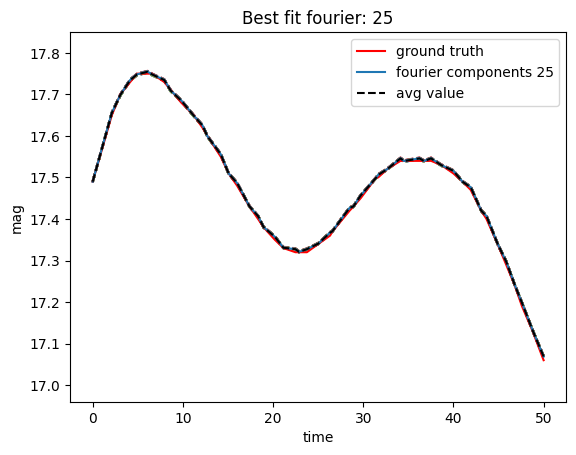

bias:  0.003667180746496816
variance 0.0008505280393994924


In [23]:
#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
Y = df_noise1.iloc[:,1:101]
y = Y.to_numpy()

y_pred_all = []

MSE_list_train = []
MSE_list_test = []

plt.title( f'Best fit fourier: {best_ncomponents}')
plt.ylim(Y_test.min() - 0.1, Y_test.max() + 0.1)

for i in range(0,100):
    y_i = y[:, i]
    # ---------------train
    # Calculate the Fourier transform
    Y_train_fft = fft(y_i)
    # Select Fourier components
    n_components = best_ncomponents  
    Y_train_fft_filtered = np.zeros_like(Y_train_fft)
    Y_train_fft_filtered[:n_components] = Y_train_fft[:n_components]
    n_samples = y_i.size
    # Build the design matrix
    X_train_fourier = np.abs(np.fft.ifft(Y_train_fft_filtered).real)
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_fourier[:, None], y_i)
    # ---------------test
    # Calculate the Fourier transform
    Y_test_fft = fft(Y_test.squeeze())
    # # Select Fourier components
    Y_test_fft_filtered = np.zeros_like(Y_test_fft)
    Y_test_fft_filtered[:n_components] = Y_test_fft[:n_components]
    # Build the design matrix
    X_test_fourier = np.abs(np.fft.ifft(Y_test_fft_filtered).real)
    # Predictions
    Y_pred_test = model.predict(X_test_fourier[:, None])
    Y_pred_train = model.predict(X_train_fourier[:,None])
    y_pred_all.append(Y_pred_test)

    # Calculate MSE on training set
    mse_train = mean_squared_error(y_i, Y_pred_train)
    MSE_list_train.append(mse_train)

    # Calculate MSE on test set
    mse_test = mean_squared_error(Y_test, Y_pred_test)
    MSE_list_test.append(mse_test)

    y_pred_all.append(Y_pred_test)

    plt.plot(X_test, Y_pred_test, linestyle='--')

pred_mean = np.mean(y_pred_all, axis=0)

plt.plot(X_test, Y_test, 'r', label = 'ground truth')
plt.plot(X_test, Y_pred_test,label = f'fourier components {best_ncomponents}')
plt.plot(X_test, pred_mean,'--k', label = 'avg value' )
plt.xlabel('time')
plt.ylabel('mag')
plt.legend(loc="best")
plt.show()

print('bias: ', mean_bias[index_min])
print('variance', mean_variance[index_min])


In [24]:
MSE_train = np.mean(MSE_list_train)
print('MSE_train: ',MSE_train)


MSE_test = np.mean(MSE_list_test)
print('MSE_test: ',MSE_test)

MSE_train:  8.60851666319718e-05
MSE_test:  2.1620287806004973e-05


#### **Kernel methods**

Mean Bias:
[0.13908042 0.07060755 0.06383995 0.06141816 0.0866933  0.0613356
 0.05564368 0.05901141 0.06451631 0.05922657 0.05540365 0.05591826
 0.05828562 0.05759666 0.06171231 0.0558539  0.05912731 0.0557128
 0.05721058 0.06170412 0.0559286  0.05591755 0.05698291 0.05584264
 0.05590898 0.05582431 0.05758183 0.05856733 0.05572657 0.0560088
 0.05793442 0.05587957 0.0598416  0.06208465 0.05606221 0.05597787
 0.05592396 0.05595288 0.05621826 0.0572921  0.05702172 0.05932586
 0.05944751 0.05696796 0.05700905 0.05705444 0.0571439  0.0569047
 0.05680114 0.05707955 0.0574363  0.05749291 0.05713807 0.06146673
 0.06575109 0.06058765 0.0628852  0.05663303 0.05661888 0.05659251
 0.05666905 0.05677919 0.05670288 0.05668683 0.05673678 0.05675433
 0.05660941 0.05725247 0.05697677 0.05682166 0.05731358 0.05726997
 0.0593252  0.05907722 0.05890002 0.06283977 0.06054976 0.0600279
 0.05757039 0.05756255 0.0575742  0.05758282 0.05761623 0.05756505
 0.05755468 0.05762378 0.0576418  0.05759473 0.05753756 

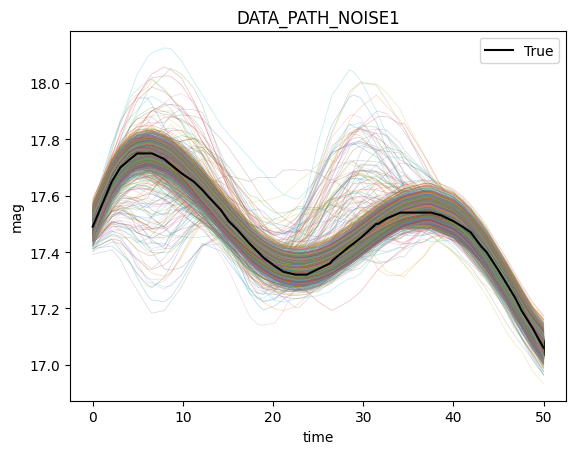

(50,)
(45,)


In [25]:
X = df_noise1[0]  #time
x = X.values.reshape(-1,1) #X[:, np.newaxis]
Y = df_noise1.iloc[:,1:101]
y = Y.to_numpy()

X_test = df_true[0]
Y_test = df_true[1]
x_test = X_test.values.reshape(-1,1) #x_test = X_test[:, np.newaxis]
y_test = Y_test.values.reshape(-1,1) #y_test = Y_test[:, np.newaxis]

in_Nsigma = 5

sigmas = list(range(in_Nsigma,200))

mean_bias = np.zeros(len(sigmas))
mean_variance = np.zeros(len(sigmas))

for j,sigma in enumerate(sigmas):
  bias = []
  y_pred_all = []
  for i in range(0,100):
    y_i = y[:, i]
    ones = []
    for k in range(0,Y.size):
      ones.append(1)

    #Do an array of ones
    ones1 = np.array(ones)

    #make de function K1 where
    #ex = data time
    #n = number of points
    #c = Centers of gaussians
    #k = number of kernels
    #d = kernels width
    def K1(ex,n,c,km,d):
      matrix = [[0 for _ in range(n)] for _ in range(km)]
      for i in range(0,km):
        for j in range (0,n):
          matrix[i][j] = m.exp(-(abs(ex[j]-c[i])**2/(d[j]**2))) #the kernel function
      return matrix

    #First Step: make the Gran_Matrix
    Gram_matrix = K1(X, X.size, X, X.size, ones1*sigma)
    #This function returns a Matrix instead an array
    Gram_matrix_M = np.asarray(Gram_matrix)

    #The pseudo inverse of the matrix wiht the function np.linalg.pinv
    #gettin the H matrix
    pinvGram_matrix_M = np.linalg.pinv(np.transpose(Gram_matrix_M))
    #In this point we can calculate the alpha becase we have the pseudo-inverse of the matrix and the points in y of that Matrix
    alpha = pinvGram_matrix_M.dot(y_i)

    #getting H from Alpha
    alphaT = np.transpose(alpha)
    #Remove axes of length one from alphaTD.
    alphaTD = np.squeeze(alphaT)

    #make the kernel method
    h = alphaTD.dot(Gram_matrix_M)

    #Remove axes of length one from h.
    hArray = np.squeeze(np.asarray(np.transpose(h)))

    #Metrics
    MSE_train = mean_squared_error(y_i,np.transpose(h))
  
    y_pred_all.append(hArray)
    #bias
    Y_test2 = Y_test[:45]
    bias.append(abs(Y_test2 - y_pred_all[i]))
    plt.plot(x, hArray,linewidth = 0.5, alpha = 0.3)
  # bias
  pred_mean = np.mean(bias, axis=0)
  mean_bias[j] = np.mean(pred_mean)

  # variance
  pred_variance = np.std(y_pred_all, axis=0)
  mean_variance[j] = np.mean(pred_variance)

#Plotting
plt.plot(x_test,y_test, color='k', label="True")

print("Mean Bias:")
print(mean_bias)
print()
print("Mean Variance:")
print(mean_variance)

plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("DATA_PATH_NOISE1")
plt.show()
print(Y_test.shape)
print(hArray.shape)

<function matplotlib.pyplot.show(close=None, block=None)>

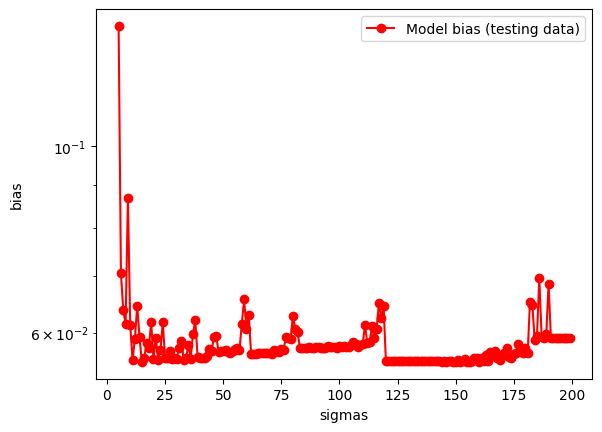

In [26]:
plt.xlabel('sigmas')
plt.ylabel('bias')
plt.plot(sigmas, mean_bias,'-ro', label = 'Model bias (testing data)')
plt.legend(loc='best')
plt.yscale('log')
# plt.xticks(range(in_Nsigma,len(sigmas)))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

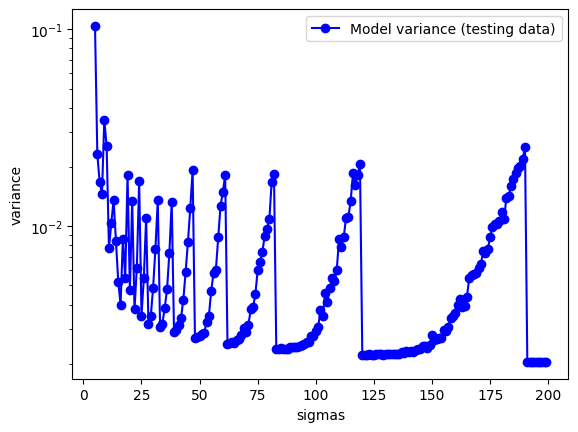

In [27]:
plt.xlabel('sigmas')
plt.ylabel('variance')
plt.plot(sigmas, mean_variance,'-bo', label = 'Model variance (testing data)')
plt.legend(loc='best')
plt.yscale('log')
# plt.xticks(range(in_Nsigma,len(sigmas)))
plt.show

In [28]:
best_sigma = sigmas[np.argmin(mean_bias)]
print(best_sigma)
index_min = np.argmin(mean_bias)
print(index_min)


152
147


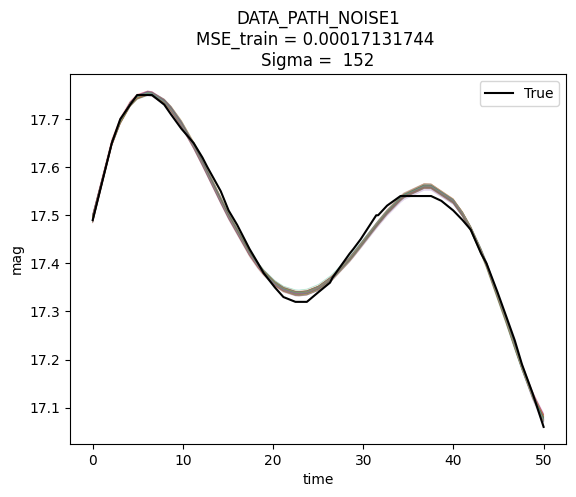

(50,)
(45,)
bias:  0.05537060621473526
variance 0.0026768734322475634


In [29]:
X = df_noise1[0]  #time
x = X.values.reshape(-1,1) #X[:, np.newaxis]
Y = df_noise1.iloc[:,1:101]
y = Y.to_numpy()

X_test = df_true[0]
Y_test = df_true[1]
x_test = X_test.values.reshape(-1,1) #x_test = X_test[:, np.newaxis]
y_test = Y_test.values.reshape(-1,1) #y_test = Y_test[:, np.newaxis]

sigma=best_sigma

MSE_train_list = []

for i in range(0,100):
    y_i = y[:, i]
    ones = []
    for k in range(0,Y.size):
      ones.append(1)

    #Do an array of ones
    ones1 = np.array(ones)

    #make de function K1 where
    #ex = data time
    #n = number of points
    #c = Centers of gaussians
    #k = number of kernels
    #d = kernels width
    def K1(ex,n,c,km,d):
      matrix = [[0 for _ in range(n)] for _ in range(km)]
      for i in range(0,km):
        for j in range (0,n):
          matrix[i][j] = m.exp(-(abs(ex[j]-c[i])**2/(d[j]**2))) #the kernel function
      return matrix

    #First Step: make the Gran_Matrix
    Gram_matrix = K1(X, X.size, X, X.size, ones1*sigma)
    #This function returns a Matrix instead an array
    Gram_matrix_M = np.asarray(Gram_matrix)

    #The pseudo inverse of the matrix wiht the function np.linalg.pinv
    #gettin the H matrix
    pinvGram_matrix_M = np.linalg.pinv(np.transpose(Gram_matrix_M))
    #In this point we can calculate the alpha becase we have the pseudo-inverse of the matrix and the points in y of that Matrix
    alpha = pinvGram_matrix_M.dot(y_i)

    #getting H from Alpha
    alphaT = np.transpose(alpha)
    #Remove axes of length one from alphaTD.
    alphaTD = np.squeeze(alphaT)

    #make the kernel method
    h = alphaTD.dot(Gram_matrix_M)

    #Remove axes of length one from h.
    hArray = np.squeeze(np.asarray(np.transpose(h)))

    #Metrics
    MSE_train = mean_squared_error(y_i,np.transpose(h))

    #----------------------------
    Gram_matrix_test = K1(X_test, X_test.size, X, X.size, ones1 * sigma)

    # Calculate predictions for test data
    h_test = alphaTD.dot(Gram_matrix_test)

    # Calculate MSE for test data
    MSE_test = mean_squared_error(y_test, np.transpose(h_test))

    MSE_list_train.append(MSE_train)
    MSE_list_test.append(MSE_test)
    plt.plot(x, hArray,linewidth = 0.5, alpha = 0.3)

#Plotting
plt.plot(x_test,y_test, color='k', label="True")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("DATA_PATH_NOISE1\nMSE_train = {:.8} \nSigma =  {:}".format(MSE_train,sigma))
plt.show()
print(Y_test.shape)
print(hArray.shape)


print('bias: ', mean_bias[index_min])
print('variance', mean_variance[index_min])

In [30]:
MSE_train = np.mean(MSE_list_train)
print('MSE_train: ',MSE_train)

MSE_test = np.mean(MSE_list_test)
print('MSE_test: ',MSE_test)

MSE_train:  0.00011098043278959848
MSE_test:  8.327705547474614e-05


### **Table: Dataset: DS-5-1-GAP-1-1-N-1**
| Regression                | MSE training          | MSE Testing (ground truth) | Bias                       | Variance                   |
|---------------------------|-----------------------|----------------------------|----------------------------|----------------------------|
| Polynomial (degree = 9)   |8.512111257842205e-05  |7.283567745835302e-05       |0.006690036291529672        |0.003946759748134829        |
| Splines (degree = 5)      |0.00606479808328759    |0.005814183614339369        |0.011563634204581886        |0.001993125121183679        |
| Fourier(n_components = 25)|8.60851666319718e-05   |2.1620287806004973e-05      |0.003667180746496816        |0.0008505280393994924       |
| Kenerl method(sigma = 59) |0.00016743339978391236 |......................      |0.05616772                  |0.00241149                  |

# **Data: DS-5-1-GAP-5-1-N-3**

#### **Plynomial regression**

In [31]:
#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
X_test = df_true[0].to_numpy()[:,np.newaxis]
Y_test = df_true[1].to_numpy()[:,np.newaxis]

X_train = df_noise2[0].to_numpy()[:,np.newaxis]

print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)

Y = df_noise2.iloc[:,1:101]
y = Y.to_numpy()


degrees = list(range(2,20))

mean_bias = np.zeros(len(degrees))
mean_variance = np.zeros(len(degrees))

for j, degree in enumerate(degrees):
    bias = []
    y_pred_all = []

    for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        # create model
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        # training 
        model.fit(X_train, y_i)
        
        y_pred_all.append(model.predict(X_test))

        bias.append(abs(Y_test - y_pred_all[i]))

    # bias
    pred_mean = np.mean(bias, axis=0)
    mean_bias[j] = np.mean(pred_mean)

    # variance
    pred_variance = np.std(y_pred_all, axis=0)
    mean_variance[j] = np.mean(pred_variance)

print("Mean Bias:")
print(mean_bias)
print()
print("Mean Variance:")
print(mean_variance)

(50, 1)
(50, 1)
(25, 1)
Mean Bias:
[0.10607181 0.09187968 0.05050545 0.03643462 0.03758568 0.04032173
 0.04228031 0.04477442 0.0485861  0.04888251 0.04851896 0.04930965
 0.05563294 0.0704391  0.11455676 0.12518624 0.13329452 0.14040393]

Mean Variance:
[0.02560118 0.03167672 0.03527781 0.0402986  0.04559276 0.04941269
 0.0526682  0.05583096 0.05445432 0.04969405 0.04968259 0.05091983
 0.05372675 0.05759329 0.04780424 0.0507615  0.05431813 0.05835109]


<function matplotlib.pyplot.show(close=None, block=None)>

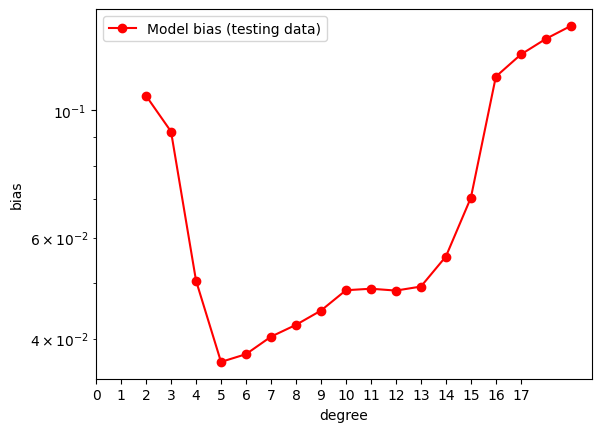

In [32]:
plt.xlabel('degree')
plt.ylabel('bias')
plt.plot(degrees, mean_bias,'-ro', label = 'Model bias (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(0,len(degrees)))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

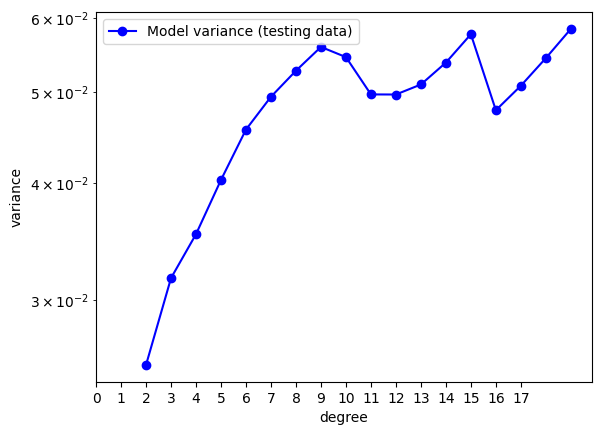

In [33]:
plt.xlabel('degree')
plt.ylabel('variance')
plt.plot(degrees, mean_variance,'-bo', label = 'Model variance (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(0,len(degrees)))
plt.show

In [34]:
best_degree = degrees[np.argmin(mean_bias)]
print(best_degree)

index_min = np.argmin(mean_bias)
print(index_min)

5
3


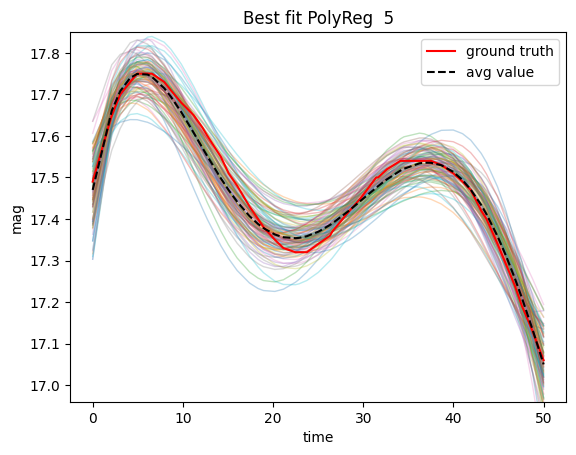

bias:  0.036434619162285936
variance 0.04029860246793506


In [35]:
plt.title( f'Best fit PolyReg  {best_degree}')
plt.ylim(Y_test.min() - 0.1, Y_test.max() + 0.1)


MSE_list_test = []
MSE_list_train =[]
y_pred_all = []

for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        # create model
        model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
        # training 
        model.fit(X_train, y_i)
        
        #Testing
        Y_pred_train = model.predict(X_train) 
        Y_pred_test = model.predict(X_test)

        MSE_train = mean_squared_error(y_i,Y_pred_train)
        MSE_test = mean_squared_error(Y_test,Y_pred_test)

        MSE_list_test.append(MSE_test)
        MSE_list_train.append(MSE_train)
                        
        y_pred_all.append(Y_pred_test)
        plt.plot(X_test,Y_pred_test,linewidth = 1, alpha = 0.3)

pred_mean = np.mean(y_pred_all, axis=0)
pred_variance = np.std(y_pred_all, axis=0)



plt.plot(X_test, Y_test, 'r', label = 'ground truth')

plt.plot(X_test, pred_mean, '--k', label = 'avg value')
plt.xlabel('time')
plt.ylabel('mag')
plt.legend(loc="best")
plt.show()

print('bias: ', mean_bias[index_min])
print('variance', mean_variance[index_min])

In [36]:
MSE_train = np.mean(MSE_list_train)
print('MSE_train: ',MSE_train)

MSE_test = np.mean(MSE_list_test)
print('MSE_test: ',MSE_test)

MSE_train:  0.005457059069296167
MSE_test:  0.002235361707444709


#### **Splines (B-spline)**

(50, 1)
(50, 1)
(25, 1)


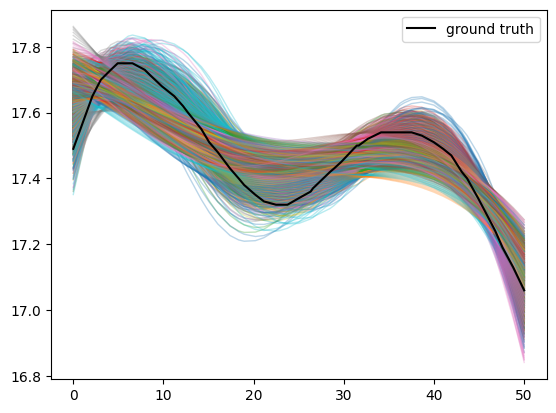

Mean Bias:
[0.05050902 0.0375114  0.03942022 0.03327819 0.03746337 0.0351709
 0.03965597 0.04126685 0.04471864 0.04815637 0.0516782  0.05572757
 0.05959692 0.0635737  0.06726199 0.07070857 0.07380965 0.07660179]

Mean Variance:
[0.03605991 0.03911008 0.03660843 0.03837006 0.03631333 0.03642909
 0.03537963 0.03481744 0.03424572 0.03364857 0.03314303 0.03262976
 0.0321779  0.03175405 0.03137057 0.03101514 0.03068416 0.03037109]


In [37]:
#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'

X_test = df_true[0].to_numpy()[:,np.newaxis]
Y_test = df_true[1].to_numpy()[:,np.newaxis]

X_train = df_noise2[0].to_numpy()[:,np.newaxis]



print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)



Y = df_noise2.iloc[:,1:101]
y = Y.to_numpy()

degrees = list(range(2,20))

mean_bias = np.zeros(len(degrees))
mean_variance = np.zeros(len(degrees))

for j, degree in enumerate(degrees):
    bias = []
    y_pred_all = []

    for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        #create model
        model = make_pipeline(SplineTransformer(n_knots=4, degree=degree), Ridge(alpha=1e-3))
        #training
        model.fit(X_train, y_i)

        #predictions
        Y_pred_train = model.predict(X_train)
        Y_pred_test = model.predict (X_test)

        y_pred_all.append(Y_pred_test)

        bias.append(abs(Y_test - y_pred_all[i]))

        plt.plot(X_test, Y_pred_test,linewidth = 1, alpha = 0.3)

    # bias
    pred_mean = np.mean(bias, axis=0)
    mean_bias[j] = np.mean(pred_mean)

    # variance
    pred_variance = np.std(y_pred_all, axis=0)
    mean_variance[j] = np.mean(pred_variance)

plt.plot(X_test, Y_test, label='ground truth', color = 'k')
plt.legend()
plt.show()

print("Mean Bias:")
print(mean_bias)
print()
print("Mean Variance:")
print(mean_variance)

<function matplotlib.pyplot.show(close=None, block=None)>

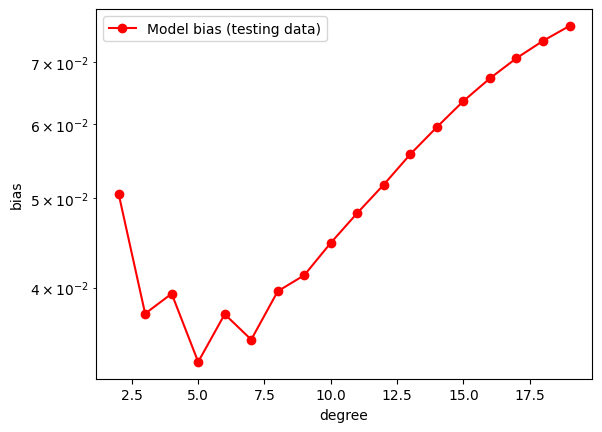

In [38]:
plt.xlabel('degree')
plt.ylabel('bias')
plt.plot(degrees, mean_bias,'-ro', label = 'Model bias (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

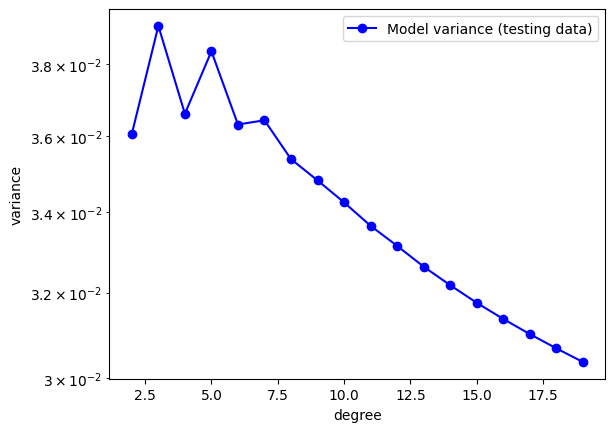

In [39]:
plt.xlabel('degree')
plt.ylabel('variance')
plt.plot(degrees, mean_variance,'-bo', label = 'Model variance (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.show

In [40]:
best_degree = degrees[np.argmin(mean_bias)]
print(best_degree)

index_min = np.argmin(mean_bias)
print(index_min)

5
3


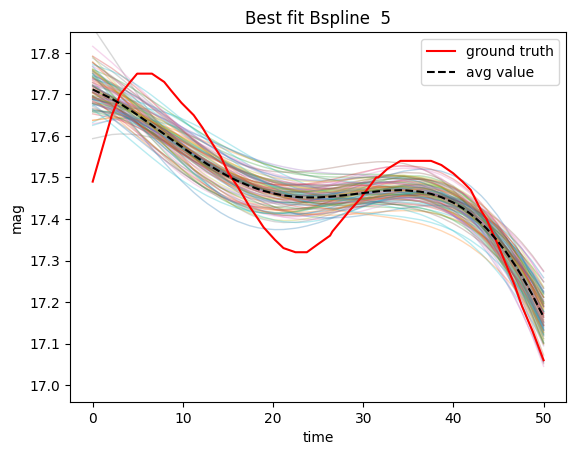

bias:  0.03327818833873526
variance 0.03837005736971363


In [41]:
plt.title( f'Best fit Bspline  {best_degree}')
plt.ylim(Y_test.min() - 0.1, Y_test.max() + 0.1)

y_pred_all = []

MSE_list_train = []
MSE_list_test = []

for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        #create model
        model = make_pipeline(SplineTransformer(n_knots=4, degree=degree), Ridge(alpha=1e-3))
        #training
        model.fit(X_train, y_i)

        #predictions
        Y_pred_train = model.predict(X_train)
        Y_pred_test = model.predict (X_test)

        #MSE
        MSE_train = mean_squared_error(y_i, Y_pred_train)
        MSE_test = mean_squared_error(Y_test, Y_pred_test)
        
        MSE_list_train.append(MSE_train)
        MSE_list_test.append(MSE_test)

        y_pred_all.append(Y_pred_test)
        plt.plot(X_test,Y_pred_test,linewidth = 1, alpha = 0.3)

pred_mean = np.mean(y_pred_all, axis=0)
pred_variance = np.std(y_pred_all, axis=0)



plt.plot(X_test, Y_test, 'r', label = 'ground truth')

plt.plot(X_test, pred_mean, '--k', label = 'avg value')
plt.xlabel('time')
plt.ylabel('mag')
plt.legend(loc="best")
plt.show()

print('bias: ', mean_bias[index_min])
print('variance', mean_variance[index_min])

In [42]:
MSE_train = np.mean(MSE_list_train)
print('MSE_train: ',MSE_train)

MSE_test = np.mean(MSE_list_test)
print('MSE_test: ',MSE_test)

MSE_train:  0.01311374761653855
MSE_test:  0.00822981194506003


#### **Fourier**

Mean Bias:
[0.12577774 0.061138   0.04949484 0.03898689 0.03380951 0.03049073
 0.02840981 0.02662245 0.02579574 0.02477627 0.02373892 0.02310106
 0.02223931 0.021583   0.0215506  0.02323303 0.02555745 0.02804311
 0.03144035 0.03777056 0.04103929 0.04645779 0.06225689 0.064384
 0.064248   0.06420337 0.06420024 0.06438641 0.06450803 0.06442076
 0.06436768 0.06437901 0.06444212 0.06464926 0.06442197 0.06437676
 0.06430318 0.06396704]

Mean Variance:
[1.59824999e-02 1.59824999e-02 1.59824999e-02 1.59824999e-02
 1.59824999e-02 1.59824999e-02 1.59824999e-02 1.59824999e-02
 1.59824999e-02 1.59824999e-02 1.59824999e-02 1.59824999e-02
 1.56832071e-02 1.52173651e-02 1.44632656e-02 1.42804211e-02
 1.31683349e-02 1.21803616e-02 1.12636615e-02 9.74479133e-03
 8.50066376e-03 6.77766520e-03 1.40842474e-03 2.23459254e-14
 2.36590378e-14 2.37157727e-14 2.50258127e-14 2.18866223e-14
 2.44614489e-14 2.31364935e-14 2.16639910e-14 2.37501244e-14
 2.50177896e-14 2.09323956e-14 2.27130044e-14 2.30426620e-14


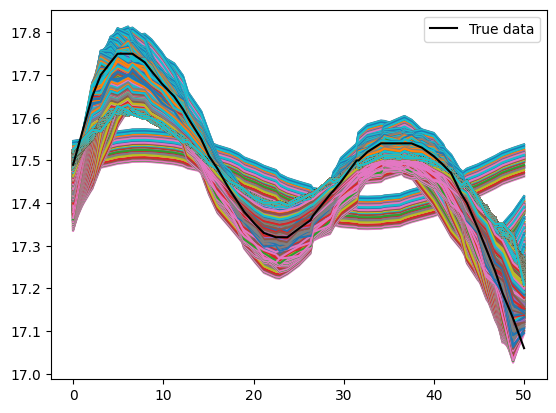

In [43]:
#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
# Load data
X_test = df_true[0].to_numpy()
Y_test = df_true[1].to_numpy()

X_train = df_noise2[0].to_numpy()



Y = df_noise2.iloc[:,1:101]
y = Y.to_numpy()
y_i = y[:, 1]

components = list(range(2,40))
mean_bias = np.zeros(len(components))
mean_variance = np.zeros(len(components))
    
for j, component in enumerate(components):
    bias = []
    y_pred_all = []
    for i in range(0,100):
        y_i = y[:, i]

        # ---------------train
        # Calculate the Fourier transform
        Y_train_fft = fft(y_i)

        # Select Fourier components
        n_components = component  
        Y_train_fft_filtered = np.zeros_like(Y_train_fft)
        Y_train_fft_filtered[:n_components] = Y_train_fft[:n_components]

        n_samples = y_i.size

        # Build the design matrix
        X_train_fourier = np.abs(np.fft.ifft(Y_train_fft_filtered).real)

        # Fit the linear regression model
        model = LinearRegression()
        model.fit(X_train_fourier[:, None], y_i)

        # ---------------test
        # Calculate the Fourier transform
        Y_test_fft = fft(Y_test)

        # # Select Fourier components
        Y_test_fft_filtered = np.zeros_like(Y_test_fft)
        Y_test_fft_filtered[:n_components] = Y_test_fft[:n_components]


        # Build the design matrix
        X_test_fourier = np.abs(np.fft.ifft(Y_test_fft_filtered).real)

        # Predictions
        Y_pred_test = model.predict(X_test_fourier[:, None])
        Y_pred_train = model.predict(X_train_fourier[:,None])
        y_pred_all.append(Y_pred_test)

        #bias
        bias.append(abs(Y_test - y_pred_all[i]))

        #plot
        plt.plot(X_test, Y_pred_test)

    # bias
    pred_mean = np.mean(bias, axis=0)
    mean_bias[j] = np.mean(pred_mean)

    # variance
    pred_variance = np.std(y_pred_all, axis=0)
    mean_variance[j] = np.mean(pred_variance)
    
print("Mean Bias:")
print(mean_bias)
print()
print("Mean Variance:")
print(mean_variance)

plt.plot(X_test, Y_test, label='True data', color = 'k')
plt.legend()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

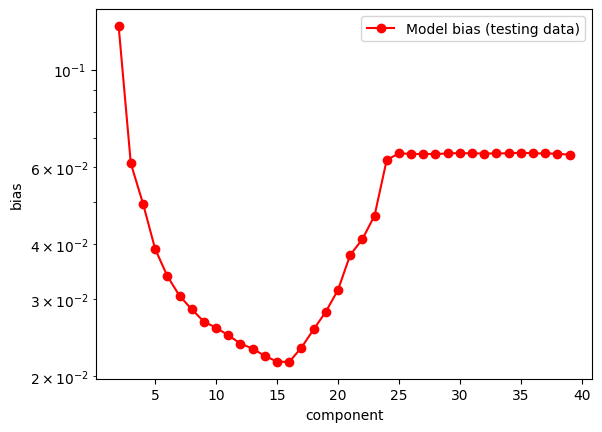

In [44]:
plt.xlabel('component')
plt.ylabel('bias')
plt.plot(components, mean_bias,'-ro', label = 'Model bias (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

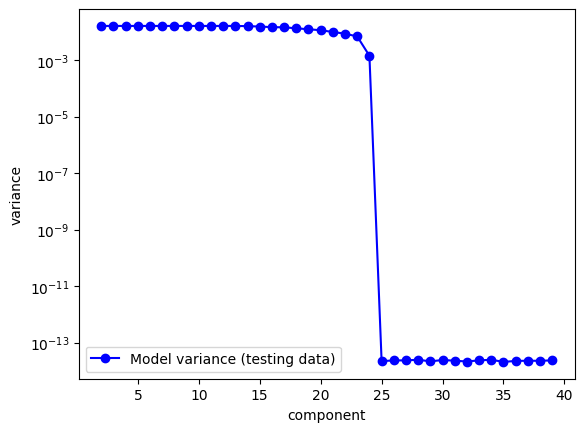

In [45]:
plt.xlabel('component')
plt.ylabel('variance')
plt.plot(components, mean_variance,'-bo', label = 'Model variance (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.show

In [46]:
best_ncomponents = components[np.argmin(mean_bias)]
print(best_ncomponents)

index_min = np.argmin(mean_bias)
print(index_min)

16
14


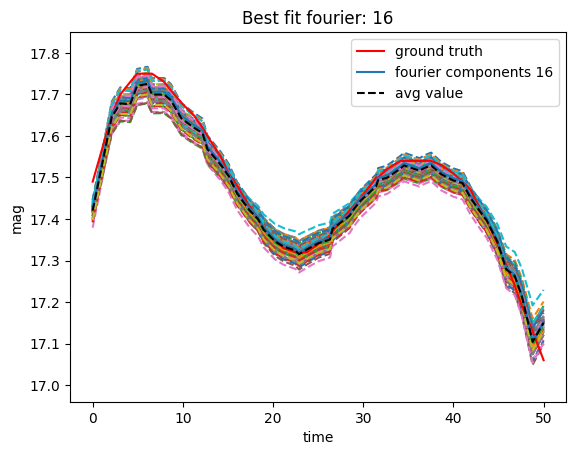

bias:  0.021550595508744327
variance 0.014463265597318848


In [47]:
#DATA_PATH_NOISE2 = ''
Y = df_noise2.iloc[:,1:101]
y = Y.to_numpy()

y_pred_all = []

MSE_list_train = []
MSE_list_test = []

plt.title( f'Best fit fourier: {best_ncomponents}')
plt.ylim(Y_test.min() - 0.1, Y_test.max() + 0.1)

for i in range(0,100):
    y_i = y[:, i]
    # ---------------train
    # Calculate the Fourier transform
    Y_train_fft = fft(y_i)
    # Select Fourier components
    n_components = best_ncomponents  
    Y_train_fft_filtered = np.zeros_like(Y_train_fft)
    Y_train_fft_filtered[:n_components] = Y_train_fft[:n_components]
    n_samples = y_i.size
    # Build the design matrix
    X_train_fourier = np.abs(np.fft.ifft(Y_train_fft_filtered).real)
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_fourier[:, None], y_i)
    # ---------------test
    # Calculate the Fourier transform
    Y_test_fft = fft(Y_test.squeeze())
    # # Select Fourier components
    Y_test_fft_filtered = np.zeros_like(Y_test_fft)
    Y_test_fft_filtered[:n_components] = Y_test_fft[:n_components]
    # Build the design matrix
    X_test_fourier = np.abs(np.fft.ifft(Y_test_fft_filtered).real)
    # Predictions
    Y_pred_test = model.predict(X_test_fourier[:, None])
    Y_pred_train = model.predict(X_train_fourier[:,None])
    y_pred_all.append(Y_pred_test)

    # Calculate MSE on training set
    mse_train = mean_squared_error(y_i, Y_pred_train)
    MSE_list_train.append(mse_train)

    # Calculate MSE on test set
    mse_test = mean_squared_error(Y_test, Y_pred_test)
    MSE_list_test.append(mse_test)

    y_pred_all.append(Y_pred_test)

    plt.plot(X_test, Y_pred_test, linestyle='--')

pred_mean = np.mean(y_pred_all, axis=0)

plt.plot(X_test, Y_test, 'r', label = 'ground truth')
plt.plot(X_test, Y_pred_test,label = f'fourier components {best_ncomponents}')
plt.plot(X_test, pred_mean,'--k', label = 'avg value' )
plt.xlabel('time')
plt.ylabel('mag')
plt.legend(loc="best")
plt.show()

print('bias: ', mean_bias[index_min])
print('variance', mean_variance[index_min])


In [48]:
MSE_train = np.mean(MSE_list_train)
print('MSE_train: ',MSE_train)


MSE_test = np.mean(MSE_list_test)
print('MSE_test: ',MSE_test)

MSE_train:  0.0014485494377859663
MSE_test:  0.000855686788903582


#### **Kernel methods**

Mean Bias:
[0.14916399 0.14916176 0.14891541 0.14836703 0.15051726 0.14778229
 0.14641765 0.14560266 0.14689153 0.15408288 0.15109249 0.14349138
 0.14380668 0.16289111 0.1478448  0.14214772 0.1436894  0.15095882
 0.14151712 0.14040474 0.140108   0.14386138 0.14049077 0.14036898
 0.14054452 0.13955111 0.1564727  0.1395443  0.1391404  0.14047392
 0.14226009 0.14315371 0.15466093 0.13873671 0.13878344 0.13870525
 0.13905365 0.13870802 0.13901585 0.13911316 0.13999445 0.14042122
 0.14401051 0.13755674 0.13761798 0.13734572 0.13763461 0.13752628
 0.13722268 0.13747679 0.1377762  0.13760431 0.13680323 0.14098319
 0.1424891  0.13947406 0.15918503 0.13700099 0.13696157 0.13703936
 0.13695551 0.13701373 0.13664241 0.13701378 0.13659549 0.13713615
 0.13674392 0.13720267 0.13600774 0.13693881 0.13533302 0.13816321
 0.13806637 0.13870477 0.1415371  0.14253672 0.1407797  0.13614225
 0.13611424 0.13619832 0.13614663 0.13629833 0.1361552  0.13617447
 0.13626743 0.13612509 0.13601275 0.13637292 0.1362

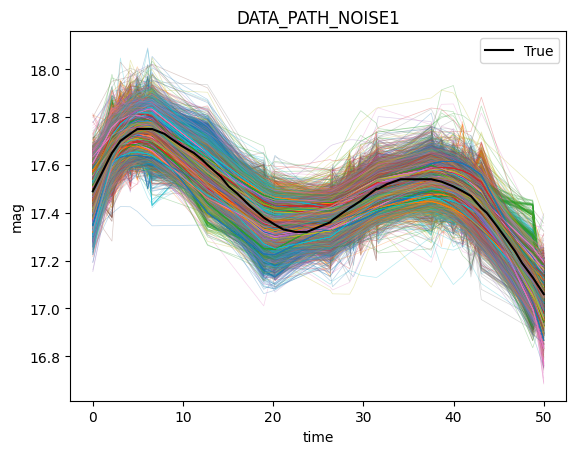

(50,)
(25,)


In [49]:
X = df_noise2[0]  #time
x = X.values.reshape(-1,1) #X[:, np.newaxis]
Y = df_noise2.iloc[:,1:101]
y = Y.to_numpy()

X_test = df_true[0]
Y_test = df_true[1]
x_test = X_test.values.reshape(-1,1) #x_test = X_test[:, np.newaxis]
y_test = Y_test.values.reshape(-1,1) #y_test = Y_test[:, np.newaxis]

in_Nsigma = 5

sigmas = list(range(in_Nsigma,200))

mean_bias = np.zeros(len(sigmas))
mean_variance = np.zeros(len(sigmas))

for j,sigma in enumerate(sigmas):
  bias = []
  y_pred_all = []
  for i in range(0,100):
    y_i = y[:, i]
    ones = []
    for k in range(0,Y.size):
      ones.append(1)

    #Do an array of ones
    ones1 = np.array(ones)

    #make de function K1 where
    #ex = data time
    #n = number of points
    #c = Centers of gaussians
    #k = number of kernels
    #d = kernels width
    def K1(ex,n,c,km,d):
      matrix = [[0 for _ in range(n)] for _ in range(km)]
      for i in range(0,km):
        for j in range (0,n):
          matrix[i][j] = m.exp(-(abs(ex[j]-c[i])**2/(d[j]**2))) #the kernel function
      return matrix

    #First Step: make the Gran_Matrix
    Gram_matrix = K1(X, X.size, X, X.size, ones1*sigma)
    #This function returns a Matrix instead an array
    Gram_matrix_M = np.asarray(Gram_matrix)

    #The pseudo inverse of the matrix wiht the function np.linalg.pinv
    #gettin the H matrix
    pinvGram_matrix_M = np.linalg.pinv(np.transpose(Gram_matrix_M))
    #In this point we can calculate the alpha becase we have the pseudo-inverse of the matrix and the points in y of that Matrix
    alpha = pinvGram_matrix_M.dot(y_i)

    #getting H from Alpha
    alphaT = np.transpose(alpha)
    #Remove axes of length one from alphaTD.
    alphaTD = np.squeeze(alphaT)

    #make the kernel method
    h = alphaTD.dot(Gram_matrix_M)

    #Remove axes of length one from h.
    hArray = np.squeeze(np.asarray(np.transpose(h)))

    #Metrics
    MSE_train = mean_squared_error(y_i,np.transpose(h))
  
    y_pred_all.append(hArray)
    #bias
    Y_test2 = Y_test[:25]
    bias.append(abs(Y_test2 - y_pred_all[i]))
    plt.plot(x, hArray,linewidth = 0.5, alpha = 0.3)
  # bias
  pred_mean = np.mean(bias, axis=0)
  mean_bias[j] = np.mean(pred_mean)

  # variance
  pred_variance = np.std(y_pred_all, axis=0)
  mean_variance[j] = np.mean(pred_variance)

#Plotting
plt.plot(x_test,y_test, color='k', label="True")

print("Mean Bias:")
print(mean_bias)
print()
print("Mean Variance:")
print(mean_variance)

plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("DATA_PATH_NOISE1")
plt.show()
print(Y_test.shape)
print(hArray.shape)

<function matplotlib.pyplot.show(close=None, block=None)>

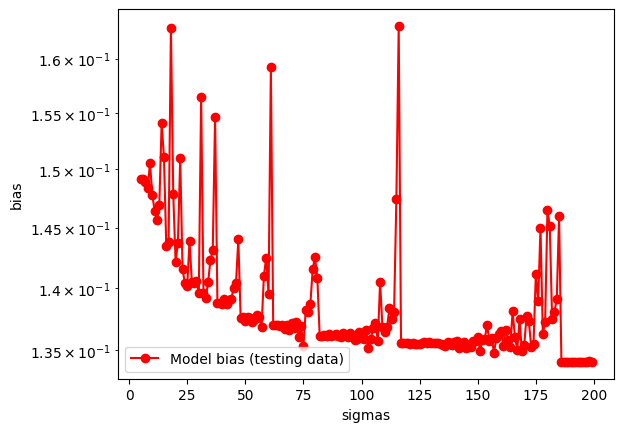

In [50]:
plt.xlabel('sigmas')
plt.ylabel('bias')
plt.plot(sigmas, mean_bias,'-ro', label = 'Model bias (testing data)')
plt.legend(loc='best')
plt.yscale('log')
# plt.xticks(range(in_Nsigma,len(sigmas)))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

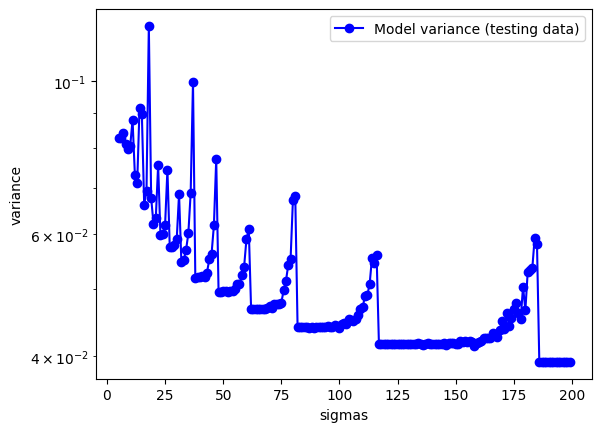

In [51]:
plt.xlabel('sigmas')
plt.ylabel('variance')
plt.plot(sigmas, mean_variance,'-bo', label = 'Model variance (testing data)')
plt.legend(loc='best')
plt.yscale('log')
# plt.xticks(range(in_Nsigma,len(sigmas)))
plt.show

In [52]:
best_sigma = sigmas[np.argmin(mean_bias)]
print(best_sigma)

index_min = np.argmin(mean_bias)
print(index_min)

196
191


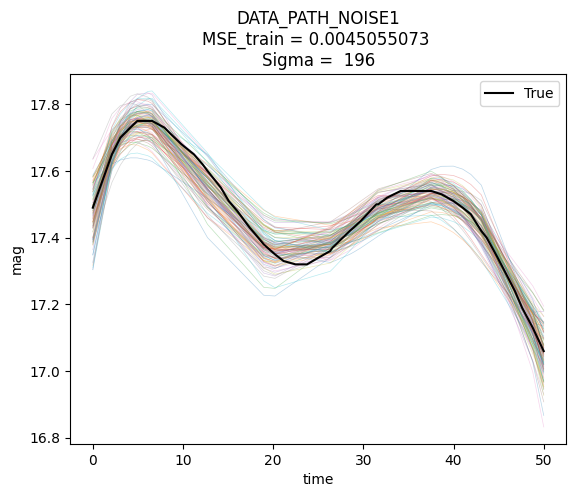

(50,)
(25,)
bias:  0.13408548596692113
variance 0.03920053391968567


In [53]:
X = df_noise2[0]  #time
x = X.values.reshape(-1,1) #X[:, np.newaxis]
Y = df_noise2.iloc[:,1:101]
y = Y.to_numpy()

X_test = df_true[0]
Y_test = df_true[1]
x_test = X_test.values.reshape(-1,1) #x_test = X_test[:, np.newaxis]
y_test = Y_test.values.reshape(-1,1) #y_test = Y_test[:, np.newaxis]

sigma=best_sigma

MSE_train_list = []
MSE_test_list = []

for i in range(0,100):
    y_i = y[:, i]
    ones = []
    for k in range(0,Y.size):
      ones.append(1)

    #Do an array of ones
    ones1 = np.array(ones)

    #make de function K1 where
    #ex = data time
    #n = number of points
    #c = Centers of gaussians
    #k = number of kernels
    #d = kernels width
    def K1(ex,n,c,km,d):
      matrix = [[0 for _ in range(n)] for _ in range(km)]
      for i in range(0,km):
        for j in range (0,n):
          matrix[i][j] = m.exp(-(abs(ex[j]-c[i])**2/(d[j]**2))) #the kernel function
      return matrix

    #First Step: make the Gran_Matrix
    Gram_matrix = K1(X, X.size, X, X.size, ones1*sigma)
    #This function returns a Matrix instead an array
    Gram_matrix_M = np.asarray(Gram_matrix)

    #The pseudo inverse of the matrix wiht the function np.linalg.pinv
    #gettin the H matrix
    pinvGram_matrix_M = np.linalg.pinv(np.transpose(Gram_matrix_M))
    #In this point we can calculate the alpha becase we have the pseudo-inverse of the matrix and the points in y of that Matrix
    alpha = pinvGram_matrix_M.dot(y_i)

    #getting H from Alpha
    alphaT = np.transpose(alpha)
    #Remove axes of length one from alphaTD.
    alphaTD = np.squeeze(alphaT)

    #make the kernel method
    h = alphaTD.dot(Gram_matrix_M)

    #Remove axes of length one from h.
    hArray = np.squeeze(np.asarray(np.transpose(h)))

    #Metrics
    MSE_train = mean_squared_error(y_i,np.transpose(h))


    #----------------------------
    Gram_matrix_test = K1(X_test, X_test.size, X, X.size, ones1 * sigma)

    # Calculate predictions for test data
    h_test = alphaTD.dot(Gram_matrix_test)

    # Calculate MSE for test data
    MSE_test = mean_squared_error(y_test, np.transpose(h_test))

    MSE_list_train.append(MSE_train)
    MSE_list_test.append(MSE_test)

    plt.plot(x, hArray,linewidth = 0.5, alpha = 0.3)

#Plotting
plt.plot(x_test,y_test, color='k', label="True")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("DATA_PATH_NOISE1\nMSE_train = {:.8} \nSigma =  {:}".format(MSE_train,sigma))
plt.show()
print(Y_test.shape)
print(hArray.shape)

print('bias: ', mean_bias[index_min])
print('variance', mean_variance[index_min])

In [54]:
MSE_train = np.mean(MSE_list_train)
print('MSE_train: ',MSE_train)

MSE_test = np.mean(MSE_list_test)
print('MSE_test: ',MSE_test)

MSE_train:  0.003448622531903397
MSE_test:  0.0015359072407190632


#### **Table: Dataset: DS-5-1-GAP-5-1-N-3**
| Regression                | MSE training          | MSE Testing (ground truth) | Bias                       | Variance                   |
|---------------------------|-----------------------|----------------------------|----------------------------|----------------------------|
| Polynomial (degree = 5)   |0.005457059069296167   |0.002235361707444709        |0.036434619162285936        |0.04029860246793506         |
| Splines (degree = 5)      |0.01311374761653855    |0.00822981194506003         |0.03327818833873526         |0.03837005736971363         |
| Fourier(n_components = 16)|0.0014485494377859663  |0.000855686788903582        |0.021550595508744327        |0.014463265597318848        |
| Kernel method(sigma = 59) | 0.0032074350483016247 |0.002130008622080765        |0.136522                    | 0.04444577                 |


# **GRNN**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math as m

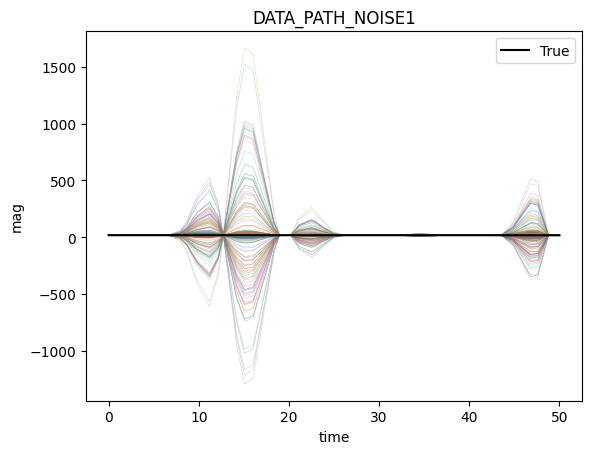

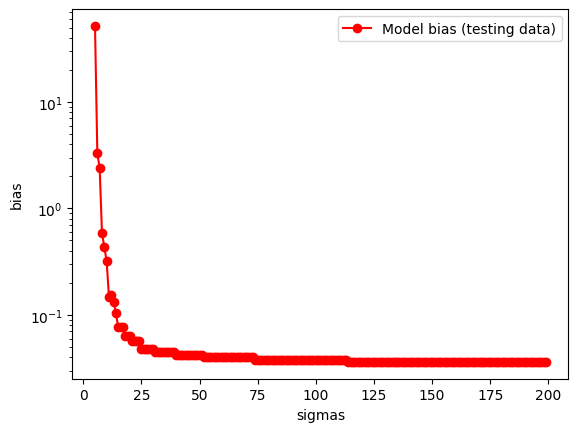

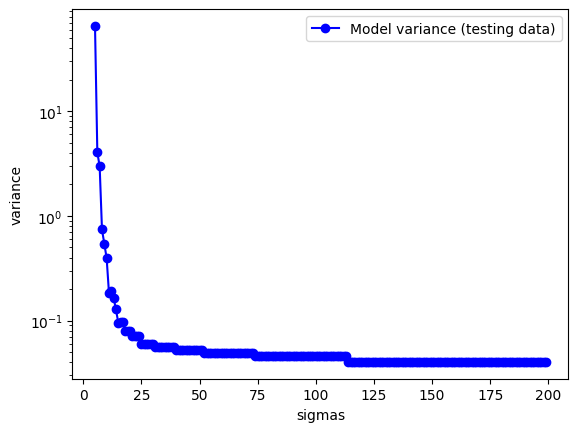

Best Sigma: 114
Bias: 0.03618458315201611
Variance: 0.04031529327775219
MSE_train: 0.004858962633963207
MSE_test: 110.88202271681308


In [9]:
def GRNN(X_train, y_train, X_test, sigma):
    # Calculate the Gram matrix
    Gram_matrix = np.exp(-((X_train[:, None] - X_train) ** 2) / (2 * (sigma ** 2)))
    
    # Calculate the alpha coefficients
    alpha = np.linalg.lstsq(Gram_matrix, y_train, rcond=None)[0]
    
    # Calculate predictions for training data
    h_train = Gram_matrix.dot(alpha)
    
    # Calculate predictions for test data
    Gram_matrix_test = np.exp(-((X_test[:, None] - X_train) ** 2) / (2 * (sigma ** 2)))
    h_test = Gram_matrix_test.dot(alpha)
    
    return h_train, h_test

# Assuming df_noise2 and df_true are your dataframes

X_train = df_noise2[0].values
y_train = df_noise2.iloc[:, 1:101].values
X_test = df_true[0].values
y_test = df_true[1].values

in_Nsigma = 5
sigmas = list(range(in_Nsigma, 200))

mean_bias = np.zeros(len(sigmas))
mean_variance = np.zeros(len(sigmas))
MSE_list_train = []
MSE_list_test = []

for j, sigma in enumerate(sigmas):
    bias = []
    y_pred_all = []
    for i in range(0, 100):
        # Use GRNN for prediction
        h_train, h_test = GRNN(X_train, y_train[:, i], X_test, sigma)
        
        # Metrics
        MSE_train = mean_squared_error(y_train[:, i], h_train)
        MSE_test = mean_squared_error(y_test, h_test)
        MSE_list_train.append(MSE_train)
        MSE_list_test.append(MSE_test)
        
        y_pred_all.append(h_test)
        # Bias
        bias.append(abs(y_test - h_test))
        plt.plot(X_test, h_test, linewidth=0.5, alpha=0.3)
    
    # Bias
    pred_mean = np.mean(bias, axis=0)
    mean_bias[j] = np.mean(pred_mean)
    
    # Variance
    pred_variance = np.std(y_pred_all, axis=0)
    mean_variance[j] = np.mean(pred_variance)

# Plotting
plt.plot(X_test, y_test, color='k', label="True")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("DATA_PATH_NOISE1")
plt.show()

# Plotting bias
plt.xlabel('sigmas')
plt.ylabel('bias')
plt.plot(sigmas, mean_bias, '-ro', label='Model bias (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.show()

# Plotting variance
plt.xlabel('sigmas')
plt.ylabel('variance')
plt.plot(sigmas, mean_variance, '-bo', label='Model variance (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.show()

best_sigma = sigmas[np.argmin(mean_bias)]

# Evaluating with the best sigma
index_min = np.argmin(mean_bias)
print("Best Sigma:", best_sigma)
print("Bias:", mean_bias[index_min])
print("Variance:", mean_variance[index_min])
print("MSE_train:", np.mean(MSE_list_train))
print("MSE_test:", np.mean(MSE_list_test))
